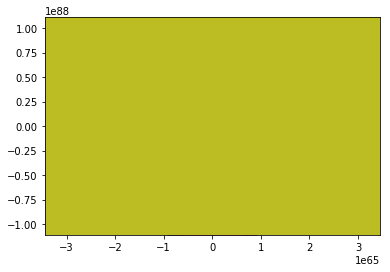

Minimum stock options = 3285
Maximum stock options = 34348384
Minimum salary = 477
Maximum salary = 1111258


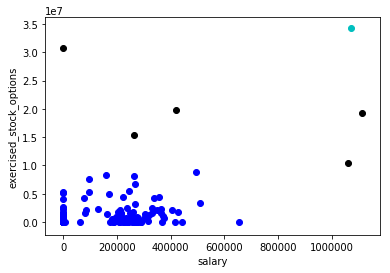

In [1]:
#!/usr/bin/python 

""" 
    Skeleton code for k-means clustering mini-project.
"""




import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit




def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()



### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "rb") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"
poi  = "poi"
features_list = [poi, feature_1, feature_2, feature_3]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2, f3 in finance_features:
    plt.scatter( f1, f2, f3 )
plt.show()

### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred
stock = [item["exercised_stock_options"] for key,item in data_dict.items() if item["exercised_stock_options"] != "NaN"]
print ("Minimum stock options = %s" %min(stock))
print ("Maximum stock options = %s" %max(stock))

sal = [item["salary"] for key,item in data_dict.items() if item["salary"] != "NaN"]
print ("Minimum salary = %s" %min(sal))
print ("Maximum salary = %s" %max(sal))


from sklearn.cluster import KMeans
pred = KMeans(n_clusters=3).fit_predict(finance_features)


### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters3.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print ("no predictions object named pred found, no clusters to plot")


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# list "sal" has to be transformed in 2-dimensional array, since this
# is expected by Scaler methods
sal_a = numpy.asarray(sal)
sal_scaled = scaler.fit_transform(sal_a.reshape(-1, 1))
print (scaler.transform(200000))

[[ 0.17962407]]


/Users/Engel/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# list "sal" has to be transformed in 2-dimensional array, since this
# is expected by Scaler methodsstock_a = numpy.asarray(stock)
stock_a = numpy.asarray(stock)
stock_scaled = scaler.fit_transform(stock_a.reshape(-1, 1))
print (scaler.transform(1000000))

[[ 0.02902059]]


/Users/Engel/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
